# Minimax com poda alfa/beta

In [10]:
import matplotlib.pyplot as plt
from tic_tac_toe import TicTacToe

# --- Minimax and Alpha-Beta with Counters ---
nodes_minimax = 0
nodes_ab = 0

def minimax_count(game, maximizing):
    global nodes_minimax
    nodes_minimax += 1

    if game.winner() == 'X':
        return 1
    elif game.winner() == 'O':
        return -1
    elif game.full():
        return 0

    if maximizing:
        best = float('-inf')
        for move in game.available_moves():
            new_game = game.copy()
            new_game.make_move(move)
            score = minimax_count(new_game, False)
            best = max(best, score)
        return best
    else:
        best = float('inf')
        for move in game.available_moves():
            new_game = game.copy()
            new_game.make_move(move)
            score = minimax_count(new_game, True)
            best = min(best, score)
        return best

def minimax_ab_count(game, maximizing, alpha=float('-inf'), beta=float('inf')):
    global nodes_ab
    nodes_ab += 1

    if game.winner() == 'X':
        return 1
    elif game.winner() == 'O':
        return -1
    elif game.full():
        return 0

    if maximizing:
        best = float('-inf')
        for move in game.available_moves():
            new_game = game.copy()
            new_game.make_move(move)
            score = minimax_ab_count(new_game, False, alpha, beta)
            best = max(best, score)
            alpha = max(alpha, score)
            if beta <= alpha:
                break
        return best
    else:
        best = float('inf')
        for move in game.available_moves():
            new_game = game.copy()
            new_game.make_move(move)
            score = minimax_ab_count(new_game, True, alpha, beta)
            best = min(best, score)
            beta = min(beta, score)
            if beta <= alpha:
                break
        return best

# --- Test Execution ---
game = TicTacToe()
# Create a partially played board to simulate a mid-game state
initial_moves = [0, 4, 1]  # X at 0, O at 4, X at 1
for move in initial_moves:
    game.make_move(move)

# Run both algorithms
nodes_minimax = 0
minimax_count(game.copy(), True)

nodes_ab = 0
minimax_ab_count(game.copy(), True)

(nodes_minimax, nodes_ab)

(935, 384)

Abaixo está o código que gera um gráfico comparando o número de nós visitados pelo algoritmo Minimax simples e com poda alfa-beta. A vantagem da poda é evidente: menos da metade dos nós precisam ser explorados para encontrar a mesma jogada ótima.

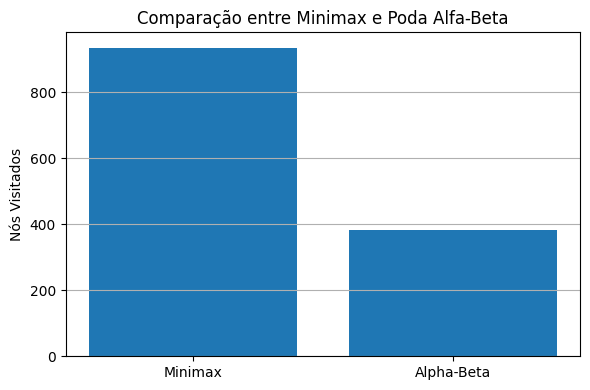

In [9]:
# Plot comparison of nodes visited
labels = ['Minimax', 'Alpha-Beta']
values = [nodes_minimax, nodes_ab]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.ylabel('Nós Visitados')
plt.title('Comparação entre Minimax e Poda Alfa-Beta')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
